In [18]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
#import helper
import datetime

In [19]:
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Lambda(lambda x: x.repeat(3,1,1)),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ])

In [20]:
# Define a transform to normalize the data
#transform = transforms.Compose([transforms.ToTensor(),
#                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [61]:
batch_size = 10
test_batch_size = 1

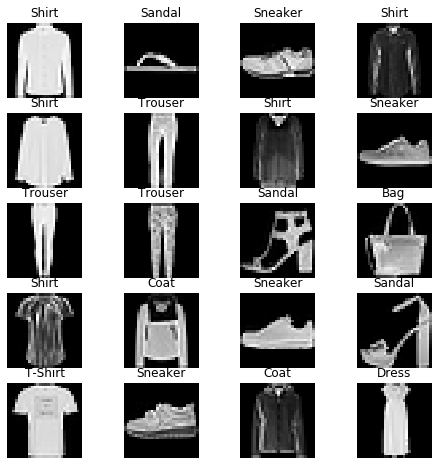

In [62]:
# Download and load the training data
train_set = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, pin_memory = True)
train_iter = DataLoader(train_set, batch_size, shuffle=True)

# Download and load the test data
test_set = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, shuffle=True)
test_iter = DataLoader(test_set, test_batch_size, shuffle=True)

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_set));
    img = train_set[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_set[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [23]:
imgnum = 0
fig = plt.figure(figsize=(1,1));
img = train_set[imgnum][0][0,:,:]
fig.add_subplot(rows, columns, i)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [24]:
fig.get_figheight

<bound method Figure.get_figheight of <Figure size 72x72 with 1 Axes>>

In [57]:
model = torch.nn.Sequential(
    torch.nn.Linear(2352, 500), 
    #torch.nn.Sigmoid(),
    torch.nn.ReLU(True),
    #torch.nn.BatchNorm1d(5),
    torch.nn.Linear(500, 100), 
    torch.nn.ReLU(True),
    torch.nn.Linear(100, 10),
    torch.nn.LogSoftmax()
)

In [82]:
loss = torch.nn.NLLLoss()
#loss = torch.nn.CrossEntropyLoss()
#trainer = torch.optim.SGD(model.parameters(), lr=0.00001)
trainer = torch.optim.Adam(model.parameters(), lr=0.000005)

In [58]:
# dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# model = model.to(dev)
# print (dev)

In [97]:
num_epochs = 200
time1 = datetime.datetime.now()
count = 0
for epoch in range(0, num_epochs):
    for X, y in train_iter:
        #X, y = X.to(dev), y.to(dev)
        trainer.zero_grad()
        l = loss(model.forward( X.view(X.shape[0], -1) ), y)
        #print(l)
        #print(model.forward( X.view(X.shape[0], -1) ))
        #print(y)
        l.backward()
        trainer.step()
        count+=1
        #break
    time2 = datetime.datetime.now()
    print(l, f'{time2-time1}, count={count}')
    count = 0
    time1 = time2
    if l < 0.02:
        break

tensor(0.0221, grad_fn=<NllLossBackward>) 0:01:20.312594, count=6000
tensor(0.0507, grad_fn=<NllLossBackward>) 0:01:19.737560, count=6000
tensor(0.0258, grad_fn=<NllLossBackward>) 0:01:19.582552, count=6000
tensor(0.0694, grad_fn=<NllLossBackward>) 0:01:19.726560, count=6000
tensor(0.2184, grad_fn=<NllLossBackward>) 0:01:19.576552, count=6000
tensor(0.0556, grad_fn=<NllLossBackward>) 0:01:19.649555, count=6000
tensor(0.2992, grad_fn=<NllLossBackward>) 0:01:19.711560, count=6000
tensor(0.0365, grad_fn=<NllLossBackward>) 0:01:19.672557, count=6000
tensor(0.0390, grad_fn=<NllLossBackward>) 0:01:19.590552, count=6000
tensor(0.2041, grad_fn=<NllLossBackward>) 0:01:19.682558, count=6000
tensor(0.0875, grad_fn=<NllLossBackward>) 0:01:19.602553, count=6000
tensor(0.0450, grad_fn=<NllLossBackward>) 0:01:19.492546, count=6000
tensor(0.0821, grad_fn=<NllLossBackward>) 0:01:19.159528, count=6000
tensor(0.3198, grad_fn=<NllLossBackward>) 0:01:19.145527, count=6000
tensor(0.0514, grad_fn=<NllLossBac

In [98]:
count = 0
right = 0
for X, y in test_iter:
        predict = model( X.view(X.shape[0], -1) ).argmax()
        if predict == y:
            right+=1
        count+=1
        
print (right/count)


0.8902


In [49]:
# check loss function
inp = torch.tensor(())
inp = inp.new_zeros((3,2))
inp[0][0] = 0
inp[0][1] = 1
inp[1][0] = 0
inp[1][1] = 1
inp[2][0] = 0
inp[2][1] = -1

tar = torch.LongTensor(())
tar = tar.new_zeros((3))
tar[0] = 1
tar[1] = 1
tar[2] = 1

loss = torch.nn.NLLLoss()
#loss = torch.nn.CrossEntropyLoss()
loss(inp, tar)

tensor(-0.3333)